# Get data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from matplotlib import colors
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import keras_tuner
import keras
from tensorflow.keras import layers

2023-11-07 13:47:15.915756: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 13:47:15.915802: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 13:47:15.923032: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 13:47:17.738118: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:

tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

2023-11-05 22:29:51.674240: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


True

2023-11-05 22:29:51.674543: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-05 22:29:51.674837: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-05 22:29:51.675029: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [ ]:


dataDir = "/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/"
dataFiles=['female_1.mat','female_2.mat','female_3.mat','male_1.mat','male_2.mat']
# dataFiles=['female_1.mat']

data = [] #processed and normalised with pose_idx
e = 2.718281828459045

def normalize_arr(arr,i):
    signal = arr.copy()
    # signal = e**signal
    # signal /= np.sum(signal)
    # signal = np.clip(signal,1e-7,1e+7)
    signal = signal.tolist()
    signal.append(int(i/2))
    signal = np.array(signal)
    return signal

def get_channel_pair(chn1,chn2,i):
    paired_data = []
    # label = list((np.array(chn1).T)[-1].T.astype(int))
    label = int(i/2)
    chn1 =  list(np.delete(chn1,0,1))
    chn2 =  list(np.delete(chn2,0,1))
    # print(np.array(chn1).shape)
    # print(label)
    # print('label[i]: ',label[i])
    for chunk1 in chn1:
        chunk2 = chn2[i].T
        chunk1 = chunk1.T

        while(len(chunk1)>0):
            row=[chunk1[0],chunk2[0],label]
            paired_data.append(row)

            chunk1 = list(chunk1)
            chunk2 = list(chunk2)
            chunk1.pop(0)
            chunk2.pop(0)

    return paired_data



for file in dataFiles:
    data_path = dataDir+file
    print(data_path)
    mat = scipy.io.loadmat(data_path)
    mat.pop("__header__")
    mat.pop("__version__")
    mat.pop("__globals__")
    i=0

    plot_interval = 100
    plot_index = 0

    for channel in mat: 
       
        if(i%2==0):
            channel2 =  channel[:-1]
            channel2 += '2'
            sigs1 = mat[channel] 
            sigs2 = mat[channel2]
            sigs1_norm = []
            sigs2_norm = []

            for signal in sigs1:
                # signal = normalize_arr(signal,i)
                if(signal[0]<2):
                    sigs1_norm.append(signal)
            for signal in sigs2:
                # signal = normalize_arr(signal,i)
                if(signal[0]<2):
                    sigs2_norm.append(signal)
            if i==0:
                data = get_channel_pair(sigs1_norm,sigs2_norm,i)
            else:
                None
                data_lc = get_channel_pair(sigs1_norm,sigs2_norm,i)
                data += data_lc
        i+=1

print(np.array(data).shape)
print(data[-3])





/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/female_1.mat


/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/female_2.mat
/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/female_3.mat
/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/male_1.mat
/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/male_2.mat
(539820, 3)
[-0.029808, 0.125662, 5]


In [ ]:
data[-2]

[0.046696, 0.074646, 5]

In [ ]:
label_arr=[]
for row in data:
    label_arr.append(int(row[2]))
print(label_arr)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
data_nm = np.copy(data)
data_nm = data_nm[:,:2]
data_nm = e**data_nm
data_nm /= np.sum(data_nm)
data_nm = np.clip(data_nm,1e-7,1e+7)


data_nm[-1]

array([1.05671369e-06, 9.81345000e-07])

In [ ]:
import pandas as pd

In [ ]:
df_lb

,0
0,0
1,0
2,0
3,0
4,0
...,...
539815,5
539816,5
539817,5
539818,5


In [ ]:
df_data_nm = pd.DataFrame(data_nm, columns = ['channel1','channel2'])

df_lb = pd.DataFrame(label_arr)

In [ ]:
data_nm = df_data_nm.assign(label=label_arr)
data_nm

,channel1,channel2,label
0,7.208241e-07,8.638379e-07,0
1,8.616990e-07,8.208744e-07,0
2,8.839567e-07,7.604011e-07,0
3,8.616990e-07,8.420817e-07,0
4,9.067893e-07,7.800469e-07,0
...,...,...,...
539815,9.067893e-07,8.861561e-07,5
539816,6.677341e-07,1.006699e-06,5
539817,6.849817e-07,8.002003e-07,5
539818,7.394422e-07,7.604011e-07,5


In [ ]:
sample = 200
rate = sample *6
print(rate)

1200


In [ ]:
def GetSpacedElements(array, numElems = 4):
    out = array[np.round(np.linspace(0, len(array)-1, numElems)).astype(int)]
    return out

# test_d = np.copy(data)
test_d = np.copy(data_nm)

if True:
    test_d=  GetSpacedElements(test_d,rate)
test_d = test_d.T

# test_d = list(test_d)
b = np.array((np.hsplit(test_d, 6)))
# b = test_d


print(test_d.shape)
print(b.shape)

(3, 1200)
(6, 3, 200)


In [ ]:
test_d

array([[7.20824056e-07, 9.54237965e-07, 7.58541932e-07, ...,
        9.78884912e-07, 1.32933498e-06, 1.05671369e-06],
       [8.63837852e-07, 1.03270730e-06, 1.05938844e-06, ...,
        1.47593664e-06, 9.09050892e-07, 9.81345000e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.00000000e+00, 5.00000000e+00, 5.00000000e+00]])

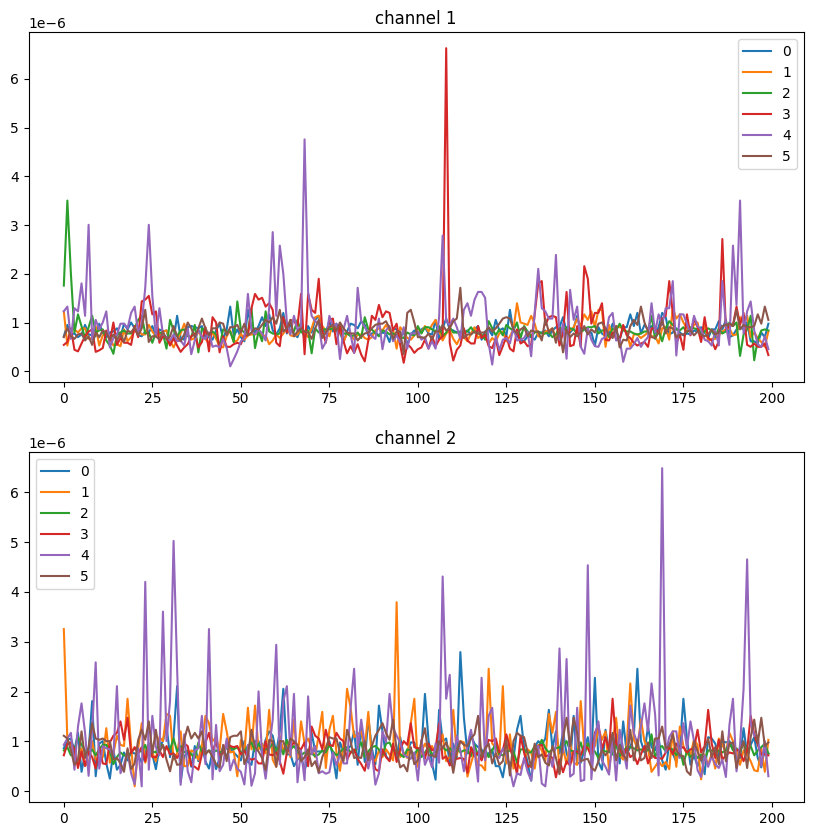

In [ ]:
w = 20
h = 20
fig = plt.figure(figsize=(10, 10))
columns = 1
rows = 2

for index in range(1,2+1):
    idx = 0
    fig.add_subplot(rows, columns, index)
    for signal in b:
        plt.plot(signal[index-1],label=str(idx))
        idx += 1
    plt.title('channel '+str(index))
    plt.legend(ncol=1)
    
        
plt.show()

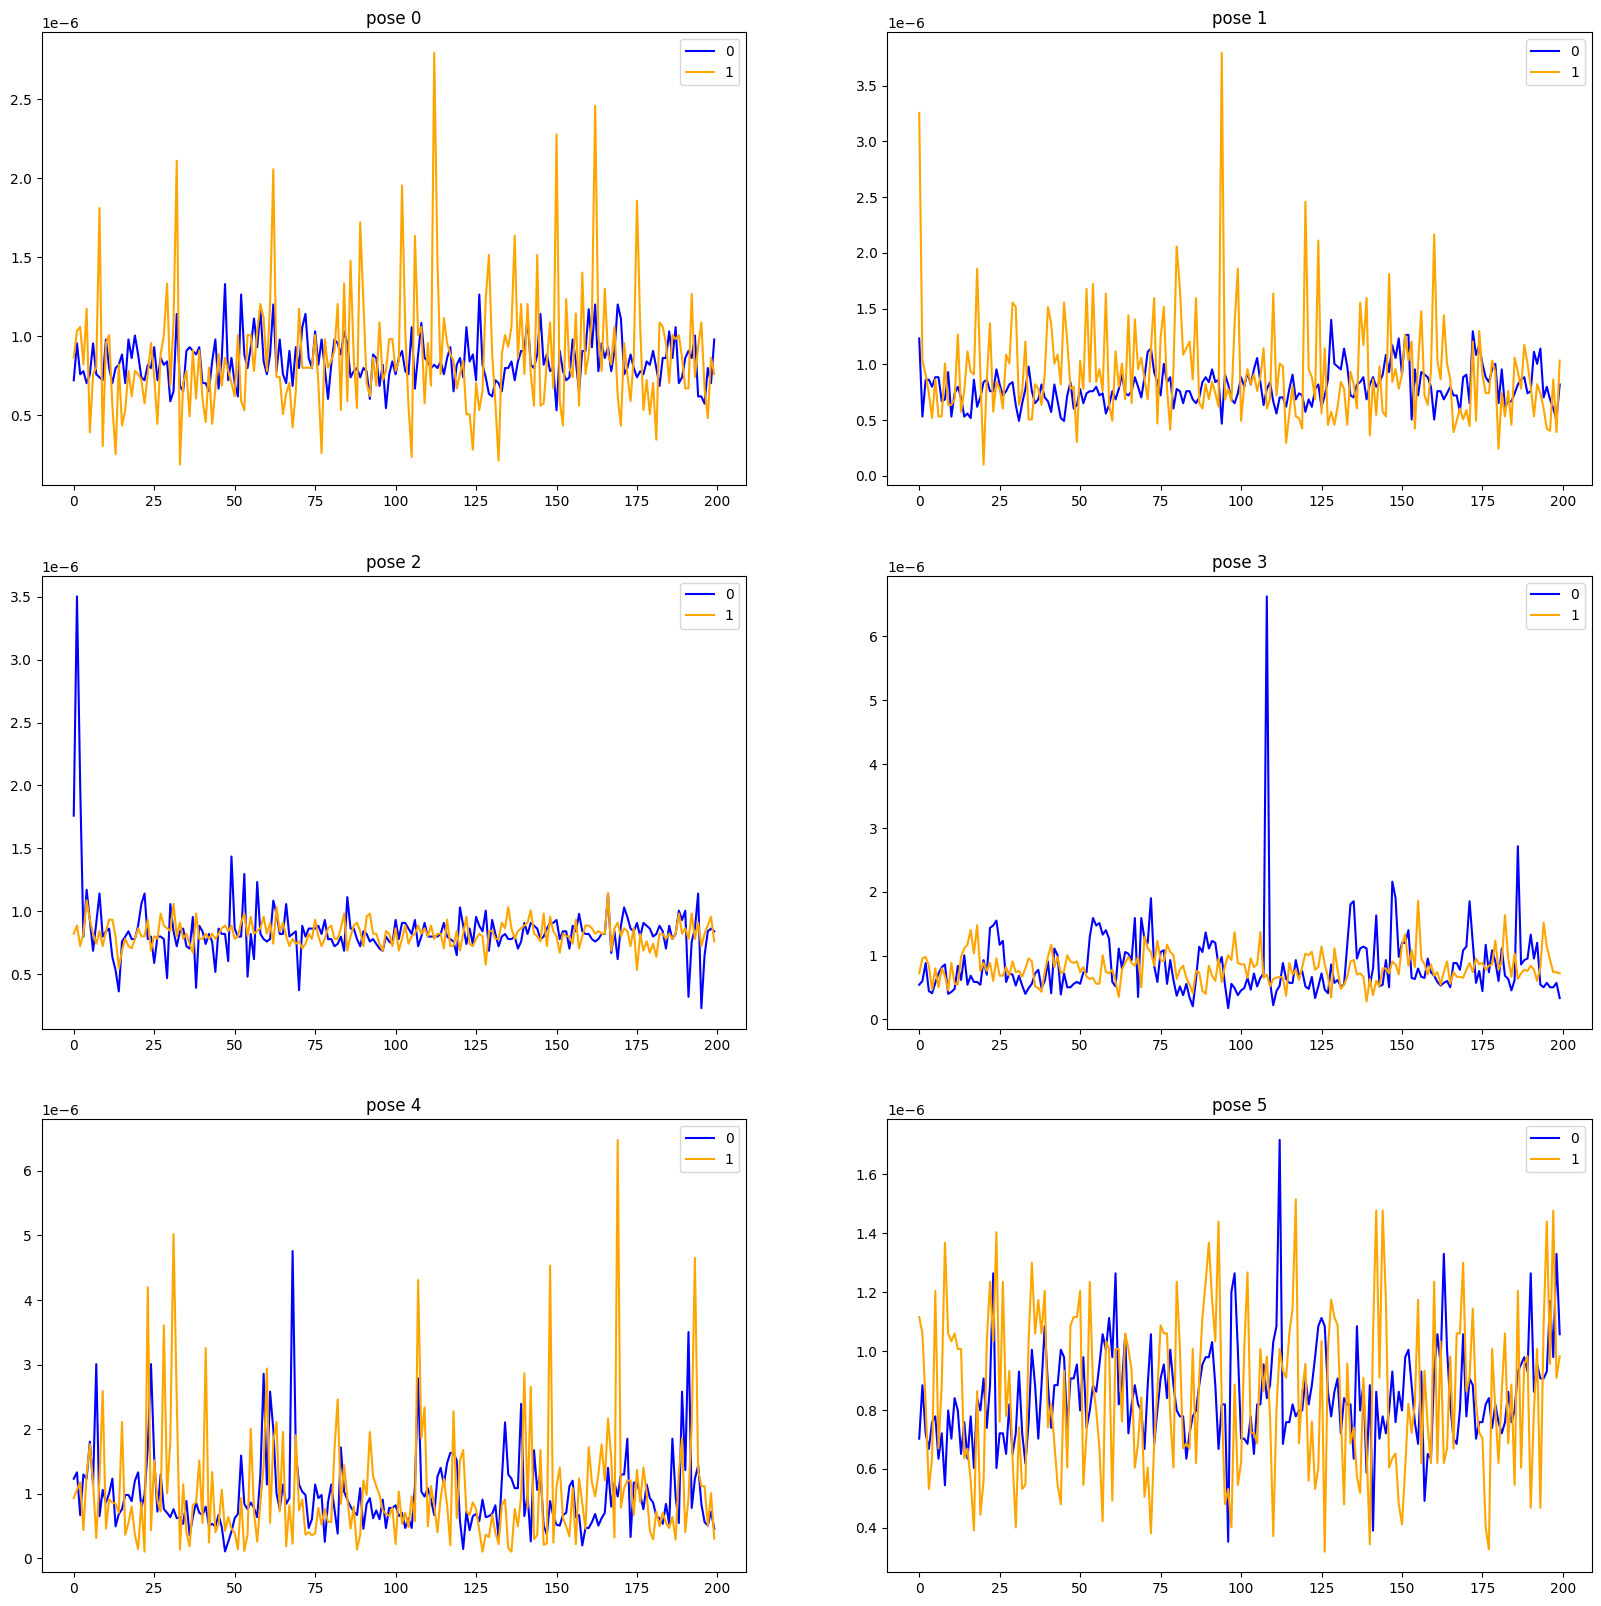

In [ ]:
w = 20
h = 20
fig = plt.figure(figsize=(20, 20))
columns = 2
rows = 3
idx = 0

for signal in b:
    fig.add_subplot(rows, columns, idx+1)
    plt.plot(signal[0],color='blue',label=str(0))
    plt.plot(signal[1],color='orange',label=str(1))
    # plt.plot(signal[0],'r-d',label=str(0))
    # plt.plot(signal[1],'k-o',label=str(1))
    idx += 1
    plt.title('pose '+str(idx-1))
    plt.legend(ncol=1)
        
plt.show()

In [ ]:
import numpy as np
a = np.arange(16.0).reshape(4,4)	   
b=np.array(np.hsplit(a, 2))
print(a.shape)
print(b.shape)


(4, 4)
(2, 4, 2)


In [ ]:
# test_d = np.array(test_d)
test_d.shape

(3, 1200)

In [ ]:
data[:20]

[[0.021195, 0.202185, 0],
 [0.199706, 0.15117, 0],
 [0.225208, 0.074646, 0],
 [0.199706, 0.176677, 0],
 [0.25071, 0.100154, 0],
 [0.25071, 0.074646, 0],
 [0.199706, 0.049139, 0],
 [0.021195, 0.074646, 0],
 [0.046696, 0.253201, 0],
 [0.072198, 0.202185, 0],
 [0.021195, 0.253201, 0],
 [0.072198, 0.253201, 0],
 [0.225208, 0.304216, 0],
 [0.199706, 0.074646, 0],
 [0.174205, -0.0784, 0],
 [0.148703, -0.154923, 0],
 [0.174205, -0.0784, 0],
 [0.072198, 0.15117, 0],
 [0.021195, 0.355232, 0],
 [0.046696, 0.355232, 0]]

In [ ]:
# dataset = data.copy()
# df = pd.DataFrame(dataset, columns = ['channel1','channel2','label'])
# df

In [ ]:
import pandas as pd
import math  
def reshape_data(n,df_data):
    # get n channel 1 and n channel 2 into 1 sample
    chn1 = df_data['channel1'].to_numpy()
    chn2 = df_data['channel2'].to_numpy()
    label = df_data['label'].to_numpy()
    i = 0
    newShape_data = []
    time = 0
    while i < chn1.size:
        #currently  the size is 540000, tack batch 20 signals, the loop will rn 27000 times
        reshape_data = np.concatenate((chn1[i:i+n], chn2[i:i+n]))
        tmp = reshape_data.tolist()
        tmp.append(int(label[i]))
        tmp = np.array(tmp)

        if(len(reshape_data)==n*2):
            newShape_data.append(tmp)
        i += n
        time += 1

    newShape_data = np.array(newShape_data)
    return newShape_data

def split_X(arr):
    arr = arr.T
    arr = arr[0:-1]
    arr = arr.T
    return arr
def split_y(arr):
    arr = arr.T
    arr = arr[-1]
    arr = arr.T.astype(np.uint8)
    return arr
def reshape_arr(arr):
    new_shape = []
    for row in arr:
        n_len =int(math.sqrt(len(row)))
        row = row.reshape(n_len,n_len)
        new_shape.append(row)
    return np.array(new_shape)
def reshape_arr_img_transfer(arr,n):
    new_shape = []
    for row in arr:
        n_len = len(row)
        # row =np.pad(row,(0,n-n_len),'symmetric')
        row =np.pad(row,(0,n-n_len),'constant',constant_values=10)
        row = row.reshape(n,n)
        new_shape.append(row)
    return np.array(new_shape)

# print(df)
# dataset = data.copy()
# df = pd.DataFrame(dataset, columns = ['channel1','channel2','label'])
df = data_nm
mask = np.random.rand(len(df)) < 0.8
dataset_t_v = df[mask] #test & val
dataset_test = df[~mask]

val_test_mask = np.random.rand(len(dataset_t_v)) < 0.5
dataset_train = dataset_t_v[val_test_mask]
dataset_val = dataset_t_v[~val_test_mask]

n=392
# n=2888
dataset_train_ar = reshape_data(n,dataset_train)
dataset_test_ar = reshape_data(n,dataset_test)
dataset_val_ar = reshape_data(n,dataset_val)
print(dataset_train_ar[-20:][-1])

np.random.shuffle(dataset_train_ar)
np.random.shuffle(dataset_test_ar)
np.random.shuffle(dataset_val_ar)

print(dataset_train_ar[-20:][-1])

X = split_X(dataset_train_ar)
y = split_y(dataset_train_ar)


X_val = split_X(dataset_train_ar)
y_val = split_y(dataset_train_ar)

X_test = split_X(dataset_test_ar)
y_test = split_y(dataset_test_ar)


# OPTIONAL TURN X TO NxN
X = reshape_arr(X)
X_val = reshape_arr(X_val)
X_test = reshape_arr(X_test)

# OPTIONAL TURN X TO NxN | N>= 150 transfer learning
tuple_size = 150
X_tl = reshape_arr_img_transfer(X,tuple_size)
X_val_tl = reshape_arr_img_transfer(X_val,tuple_size)
X_test_tl = reshape_arr_img_transfer(X_test,tuple_size)

[9.30210663e-07 5.72996770e-07 8.83956700e-07 6.34531594e-07
 1.20042157e-06 8.83956700e-07 6.67734126e-07 8.40002678e-07
 6.02979428e-07 7.98233435e-07 7.78135038e-07 8.61699050e-07
 8.18851771e-07 6.50920867e-07 9.78884912e-07 7.39442171e-07
 6.18554361e-07 1.08400856e-06 1.05671369e-06 8.61699050e-07
 1.00416947e-06 1.17019547e-06 8.83956700e-07 7.58541932e-07
 8.18851771e-07 7.98233435e-07 1.11200846e-06 6.84981670e-07
 7.98233435e-07 7.58541932e-07 8.83956700e-07 7.39442171e-07
 8.83956700e-07 7.02674015e-07 9.54237965e-07 7.20824056e-07
 1.03010712e-06 1.03010712e-06 7.78135038e-07 7.39442171e-07
 7.39442171e-07 7.58541932e-07 6.50920867e-07 6.84981670e-07
 9.06789264e-07 6.67734126e-07 1.11200846e-06 8.61699050e-07
 7.78135038e-07 6.34531594e-07 7.98233435e-07 6.50920867e-07
 1.08400856e-06 8.40002678e-07 7.78135038e-07 9.06789264e-07
 7.02674015e-07 1.03010712e-06 9.30210663e-07 7.39442171e-07
 7.98233435e-07 8.83956700e-07 8.61699050e-07 6.67734126e-07
 7.78135038e-07 9.542379

In [ ]:
y[0]

0

In [ ]:
X_tl[0]

array([[7.98233435e-07, 7.78135038e-07, 8.83956700e-07, ...,
        1.00000000e+01, 1.00000000e+01, 1.00000000e+01],
       [9.06789264e-07, 9.54237965e-07, 8.61699050e-07, ...,
        1.00000000e+01, 1.00000000e+01, 1.00000000e+01],
       [8.61699050e-07, 8.18851771e-07, 8.61699050e-07, ...,
        1.00000000e+01, 1.00000000e+01, 1.00000000e+01],
       ...,
       [1.00000000e+01, 1.00000000e+01, 1.00000000e+01, ...,
        1.00000000e+01, 1.00000000e+01, 1.00000000e+01],
       [1.00000000e+01, 1.00000000e+01, 1.00000000e+01, ...,
        1.00000000e+01, 1.00000000e+01, 1.00000000e+01],
       [1.00000000e+01, 1.00000000e+01, 1.00000000e+01, ...,
        1.00000000e+01, 1.00000000e+01, 1.00000000e+01]])

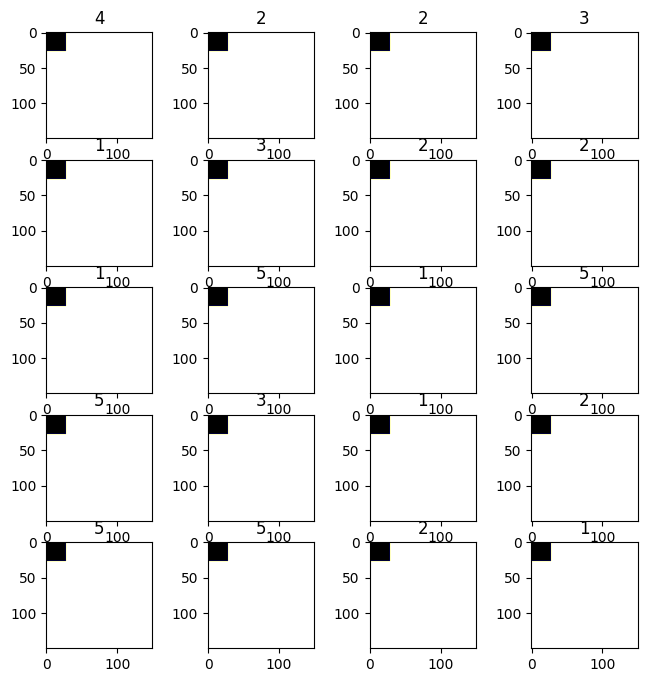

[4 2 2 3 1 3 2 2 1 5 1 5 5 3 1 2 5 5 2 1]


In [ ]:
w = 20
h = 20
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.title(y[i-1])
    plt.imshow(X_tl[i-1],cmap='gnuplot2')
plt.show()
print(y[:(columns*rows)])

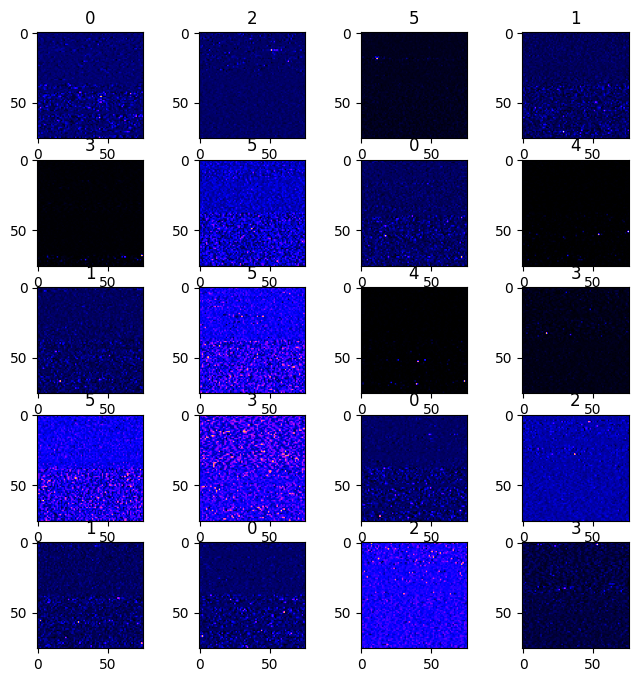

[0 2 5 1 3 5 0 4 1 5 4 3 5 3 0 2 1 0 2 3]


In [ ]:
w = 20
h = 20
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.title(y[i-1])
    plt.imshow(X[i-1],cmap='gnuplot2')

plt.show()
print(y[:(columns*rows)])

In [ ]:
dataset_train

,channel1,channel2,label
2,8.839567e-07,7.604011e-07,0
3,8.616990e-07,8.420817e-07,0
13,8.616990e-07,7.604011e-07,0
22,7.982334e-07,7.800469e-07,0
23,9.542380e-07,8.638379e-07,0
...,...,...,...
539809,1.200422e-06,5.457964e-07,5
539814,9.542380e-07,6.044247e-07,5
539817,6.849817e-07,8.002003e-07,5
539818,7.394422e-07,7.604011e-07,5


In [ ]:
X.shape

(74, 76, 76)

# NN
## training & evaluate

In [ ]:


# inputs = keras.Input(shape=(392*2,1))
input_dim = int(math.sqrt(n*2))
inputs = keras.Input(shape=(input_dim,input_dim))

x = layers.Rescaling(2)(inputs)
x = layers.Flatten()(x)
# Apply some convolution and pooling layers
# x = layers.Flatten()(inputs)

x = layers.Conv2D(500, (3,3), activation='relu', input_shape=input_shape[1:])(x)

# x = layers.Conv1D( 1024, 2, activation='relu',input_shape=input_shape[1:])(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x)

x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
num_classes = 6
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

In [ ]:
# inputs = keras.Input(shape=(150, 150, 3))

# x = layers.Dense(2048, activation="relu")(x)
# x = layers.Conv2D(500, (3,3), activation='relu', input_shape=input_shape[1:])(x)

# # x = layers.Conv1D( 1024, 2, activation='relu',input_shape=input_shape[1:])(x)
# x = layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x)
# x = layers.Conv1D( 1024, 2, activation='relu',input_shape=input_shape[1:])(x)

# # x = layers.Conv2D(200, 3, activation='relu', input_shape=input_shape[1:])(x)
# # x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x)

# x = layers.Dense(128, activation="relu")(x)

# x = keras.layers.GlobalAveragePooling2D()(x)

# num_classes = 6

# outputs = layers.Dense(num_classes, activation="softmax")(x)

# x = layers.Dense(num_classes, activation="softmax")(x)
# x = keras.layers.Dropout(0.2)(x)  

# outputs = keras.layers.Dense(6)(x)  # Regularize with dropout
# model = keras.Model(inputs, outputs)

# model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 76, 76)]          0         
                                                                 
 rescaling_1 (Rescaling)     (None, 76, 76)            0         
                                                                 
 flatten_1 (Flatten)         (None, 5776)              0         
                                                                 
 dense_35 (Dense)            (None, 128)               739456    
                                                                 
 dense_36 (Dense)            (None, 128)               16512     
                                                                 
 dense_37 (Dense)            (None, 6)                 774       
                                                                 
Total params: 756742 (2.89 MB)
Trainable params: 756742 (2.

In [ ]:
# model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
#               loss=keras.losses.CategoricalCrossentropy())
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

batch_size = 64
epochs = 1000
history = model.fit(X, y,batch_size=batch_size, epochs=epochs)


Epoch 1/1000


2/2 [==============================] - 1s 5ms/step - loss: 1.7919
Epoch 2/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.7919
Epoch 3/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7916
Epoch 4/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.7916
Epoch 5/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.7917
Epoch 6/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7918
Epoch 7/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.7919
Epoch 8/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.7919
Epoch 9/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7920
Epoch 10/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.7920
Epoch 11/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.7920
Epoch 12/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7919
Epoch 13/1000
2/2 [==============================] - 0s 4ms/st

## visualise training history

In [ ]:
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 1000, 'steps': 2}
dict_keys(['loss'])


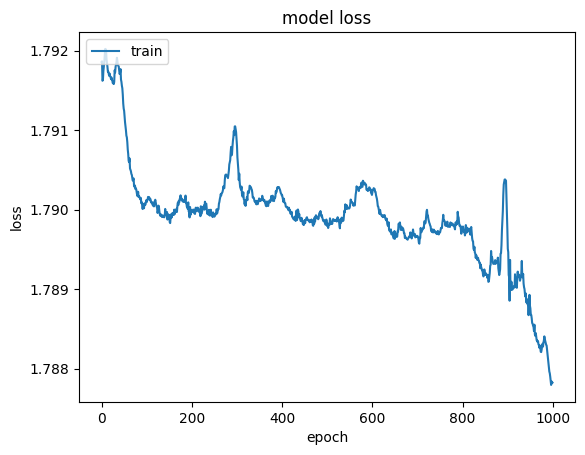

In [ ]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
evaluate = model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 1.7859


In [ ]:
# model.save("./models/model_tuner.keras")

In [ ]:
print('X,y shape: ',X.shape,'/',y.shape,"\nX,y test shape: ",X_test.shape,"/", y_test.shape)

X,y shape:  (74, 76, 76) / (74,) 
X,y test shape:  (37, 76, 76) / (37,)


## tuning with tuner

In [ ]:
def build_model(hp):
    input_dim = int(math.sqrt(n*2))
    inputs = keras.Input(shape=(input_dim,input_dim))

    x = layers.Rescaling(2)(inputs)
    x = layers.Flatten()(x)
    # Apply some convolution and pooling layers
    # x = layers.Flatten()(inputs)

    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dense(128, activation="relu")(x)
    num_classes = 6
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.summary()
    return model


In [ ]:

tuner = keras_tuner.tuners.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=100,
    executions_per_trial=2,
    directory='my_dir')


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 76, 76)]          0         
                                                                 
 rescaling_2 (Rescaling)     (None, 76, 76)            0         
                                                                 
 flatten_2 (Flatten)         (None, 5776)              0         
                                                                 
 dense_38 (Dense)            (None, 128)               739456    
                                                                 
 dense_39 (Dense)            (None, 128)               16512     
                                                                 
 dense_40 (Dense)            (None, 6)                 774       
                                                                 
Total params: 756742 (2.89 MB)
Trainable params: 756742 (2.

In [ ]:
tuner.search(X,y,epochs= 10, validation_data=(X_val,y_val))

In [ ]:
models = tuner.get_best_models(num_models=2)

In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")


In [ ]:
history = model.fit(X, y,batch_size=batch_size, epochs=epochs)


Epoch 1/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.7878
Epoch 2/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7877
Epoch 3/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7878
Epoch 4/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7878
Epoch 5/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7878
Epoch 6/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.7879
Epoch 7/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7880
Epoch 8/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7880
Epoch 9/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.7880
Epoch 10/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7880
Epoch 11/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.7882
Epoch 12/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.7881
Epoch 13/1000
2/2 [==============================

2/2 [==============================] - 0s 7ms/step - loss: 1.7876
Epoch 18/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7877
Epoch 19/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7876
Epoch 20/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7875
Epoch 21/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7875
Epoch 22/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7875
Epoch 23/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7874
Epoch 24/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7874
Epoch 25/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7875
Epoch 26/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.7873
Epoch 27/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7873
Epoch 28/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7872
Epoch 29/1000
2/2 [==============================] - 0

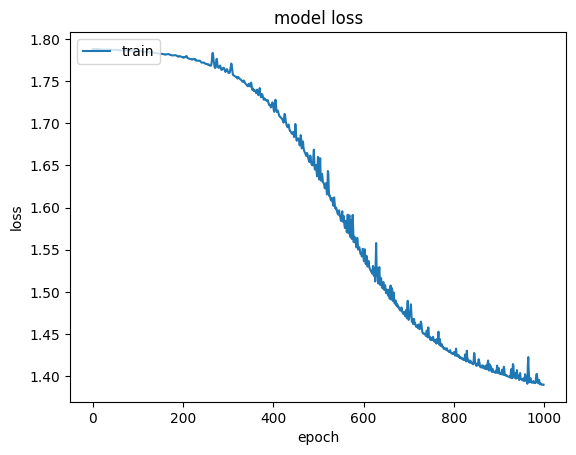

In [ ]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# model.save("./models/model_tuner.keras")

In [ ]:
evaluate = model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 1.5490


## Transfer Learning
- RESNET50

OPTIONAL TURN X TO NxN | N>= 150 transfer learning
tuple_size = 150
X_tl = reshape_arr_img_transfer(X,tuple_size)
X_val_tl = reshape_arr_img_transfer(X_val,tuple_size)
X_test_tl = reshape_arr_img_transfer(X_test,tuple_size)

In [ ]:
print(X[0].shape)
rgb_batch_ts =  np.repeat(X[0][..., np.newaxis], 3, -1)
rgb_batch_ts.shape

(76, 76)


(76, 76, 3)

In [ ]:
def signal_to_3channelimg(arr):
    print(arr[0].shape)
    rgb_batch_ts =  np.repeat(arr[..., np.newaxis], 3, -1)
    rgb_batch_ts.shape
    return rgb_batch_ts

In [ ]:
X_tl = signal_to_3channelimg(X_tl)
X_val_tl = signal_to_3channelimg(X_val_tl)
X_test_tl = signal_to_3channelimg(X_test_tl)

(150, 150)
(150, 150)
(150, 150)


In [ ]:
#create basemodel and get it pre-trained para
base_model = keras.applications.ResNet50(
    weights="imagenet",
    input_shape=(150,150,3),
    include_top=False
    )
base_model.trainable = False    
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_15[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
1024/2

512.0

In [ ]:
inputs = keras.Input(shape=(150, 150, 3))


# x = layers.Rescaling(2)(inputs)
# x = layers.Flatten()(x)
x = base_model(inputs, training=False)

# Apply some convolution and pooling layers
# x = layers.Flatten()(inputs)

x = layers.Dense(2048, activation="relu")(x)
# x = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')
# x = layers.Flatten()(x)
# x = layers.Convolution1D(x,kernel_size=2)
# x = layers.Convolution1D(x)
# input_shape=[5,5,2048]
# x = layers.Conv2D(500, 3, activation='relu', input_shape=input_shape[1:])(x)
x = layers.Conv2D(500, (3,3), activation='relu', input_shape=input_shape[1:])(x)

# x = layers.Conv1D( 1024, 2, activation='relu',input_shape=input_shape[1:])(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x)
x = layers.Conv1D( 1024, 2, activation='relu',input_shape=input_shape[1:])(x)

# x = layers.Conv2D(200, 3, activation='relu', input_shape=input_shape[1:])(x)
# x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x)

x = layers.Dense(128, activation="relu")(x)

x = keras.layers.GlobalAveragePooling2D()(x)

num_classes = 6

outputs = layers.Dense(num_classes, activation="softmax")(x)

x = layers.Dense(num_classes, activation="softmax")(x)
x = keras.layers.Dropout(0.2)(x)  

outputs = keras.layers.Dense(6)(x)  # Regularize with dropout
model = keras.Model(inputs, outputs)

model.summary()

NameError: name 'keras' is not defined

In [ ]:
inputs = keras.Input(shape=(150, 150, 3))


# x = layers.Rescaling(2)(inputs)
# x = layers.Flatten()(x)
x = base_model(inputs, training=False)

# Apply some convolution and pooling layers
# x = layers.Flatten()(inputs)

x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)

x = keras.layers.GlobalAveragePooling2D()(x)

num_classes = 6

# outputs = layers.Dense(num_classes, activation="softmax")(x)

x = layers.Dense(num_classes, activation="softmax")(x)
x = keras.layers.Dropout(0.2)(x)  

outputs = keras.layers.Dense(6)(x)  # Regularize with dropout
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 dense_51 (Dense)            (None, 5, 5, 128)         262272    
                                                                 
 dense_52 (Dense)            (None, 5, 5, 128)         16512     
                                                                 
 global_average_pooling2d (  (None, 128)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_53 (Dense)            (None, 6)                 774       
                                                          

In [ ]:
X_tl.shape


(74, 150, 150, 3)

In [ ]:
y.shape

(74,)

In [ ]:
# model.compile(
#     optimizer=keras.optimizers.Adam(),
#     loss=keras.losses.sparse_categorical_crossentropy(from_logits=True),
#     metrics=[keras.metrics.BinaryAccuracy()],
# )
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
batch_size = 64
epochs = 1000
# history_tl = model.fit((X_tl,y), epochs=epochs, validation_data=(X_val_tl,y_val))
history_tl = model.fit(X_tl, y,batch_size=batch_size, epochs=epochs)


In [ ]:

# summarize history for loss
plt.plot(history_tl.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history_tl' is not defined

In [ ]:
model.evaluate(X_test_tl,y_test)

2/2 [==============================] - 4s 1s/step - loss: 1.7918


1.7917596101760864

# ALGO
## Random Forest

In [ ]:
import math
import urllib
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_decision_forests as tfdf


In [ ]:
dataset_train

In [ ]:
print(dataset_test_ar[0][-1])
column_name =np.array(list(range(n*2+1)))
column_name=column_name+1
column_name=column_name.astype('str')
column_name
us = pd.DataFrame(dataset_test_ar,columns=column_name)

In [ ]:
us

In [ ]:
# # Train a Gradient Boosted Trees model.
# model = tfdf.keras.GradientBoostedTreesModel(num_trees=1500)
lbel_index = n*n
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(us,label=str(n*2+1))

# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)


In [ ]:
model_1.summary()

# Bluetooth <placeholder>

In [ ]:
import bluetooth

nearby_devices = bluetooth.discover_devices(lookup_names=True)
print("Found {} devices.".format(len(nearby_devices)))

for addr, name in nearby_devices:
    print("  {} - {}".format(addr, name))